In [1]:
import pandas as pd 
import matplotlib.pyplot as pp

df = pd.read_csv('forecast.csv')

df.head(2500)

Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure     Rain
0       23.720338  89.592641    7.335604    50.501694  1032.378759     rain
1       27.879734  46.489704    5.952484     4.990053   992.614190  no rain
2       25.069084  83.072843    1.371992    14.855784  1007.231620  no rain
3       23.622080  74.367758    7.050551    67.255282   982.632013     rain
4       20.591370  96.858822    4.643921    47.676444   980.825142  no rain
...           ...        ...         ...          ...          ...      ...
2495    21.791602  45.270902   11.807192    55.044682  1017.686181  no rain
2496    27.558479  46.481744   10.884915    39.715133  1008.590961  no rain
2497    28.108274  43.817178    2.897128    75.842952   999.119187  no rain
2498    14.789275  57.908105    2.374717     2.378743  1046.501875  no rain
2499    26.554356  97.101517   18.563084    81.357508  1001.729176  no rain

[2500 rows x 6 columns]

In [2]:
# Counting rainy days while switching them out for integer values
rainCount = 0
noRainCount = 0

for i in range(len(df.loc[:, 'Rain'])):
    if df.loc[i, 'Rain'] == 'rain':
        df.loc[i, 'Rain'] = 1
        rainCount += 1
    else:
        df.loc[i, 'Rain'] = 0
        noRainCount += 1

df = df.astype({'Rain': 'int32'})

print(f"Rainy days: {rainCount}");
print(f"Not rainy days: {noRainCount}");

Rainy days: 314
Not rainy days: 2186


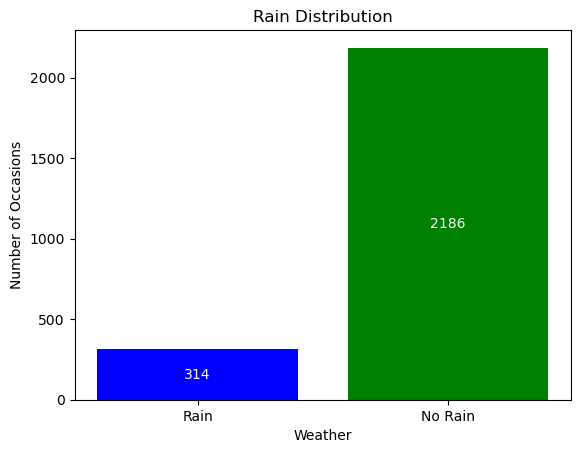

In [3]:
pp.figure()
bars = pp.bar(['Rain', 'No Rain'], [rainCount, noRainCount], color=['blue', 'green'])
pp.bar_label(bars, [rainCount, noRainCount], label_type='center', color='white')
pp.title('Rain Distribution')
pp.xlabel('Weather')
pp.ylabel('Number of Occasions')
#pp.tight_layout()
pp.show()

In [4]:
df.head(2500)

Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure  Rain
0       23.720338  89.592641    7.335604    50.501694  1032.378759     1
1       27.879734  46.489704    5.952484     4.990053   992.614190     0
2       25.069084  83.072843    1.371992    14.855784  1007.231620     0
3       23.622080  74.367758    7.050551    67.255282   982.632013     1
4       20.591370  96.858822    4.643921    47.676444   980.825142     0
...           ...        ...         ...          ...          ...   ...
2495    21.791602  45.270902   11.807192    55.044682  1017.686181     0
2496    27.558479  46.481744   10.884915    39.715133  1008.590961     0
2497    28.108274  43.817178    2.897128    75.842952   999.119187     0
2498    14.789275  57.908105    2.374717     2.378743  1046.501875     0
2499    26.554356  97.101517   18.563084    81.357508  1001.729176     0

[2500 rows x 6 columns]

In [5]:
df.describe()

Temperature     Humidity   Wind_Speed  Cloud_Cover     Pressure  \
count  2500.000000  2500.000000  2500.000000  2500.000000  2500.000000   
mean     22.581725    64.347094     9.906255    49.658104  1014.312336   
std       7.326996    19.954739     5.780316    29.123104    20.196433   
min      10.001842    30.005071     0.009819     0.015038   980.014486   
25%      16.359398    47.339815     4.761909    23.900016   996.938630   
50%      22.536448    63.920797     9.908572    49.488284  1013.433035   
75%      28.976476    81.561021    14.948408    75.324140  1031.735067   
max      34.995214    99.997481    19.999132    99.997795  1049.985593   

              Rain  
count  2500.000000  
mean      0.125600  
std       0.331464  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [6]:
df.quantile([0.25, 0.75])

Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure  Rain
0.25    16.359398  47.339815    4.761909    23.900016   996.938630   0.0
0.75    28.976476  81.561021   14.948408    75.324140  1031.735067   0.0

In [7]:
ndf = df.copy()
ndf.loc[:,'Temperature'] = (df.loc[:,'Temperature']-min(df.loc[:,'Temperature']))/(max(df.loc[:,'Temperature'])-min(df.loc[:,'Temperature']))
ndf.loc[:,'Humidity'] = (df.loc[:,'Humidity']-min(df.loc[:,'Humidity']))/(max(df.loc[:,'Humidity'])-min(df.loc[:,'Humidity']))
ndf.loc[:,'Wind_Speed'] = (df.loc[:,'Wind_Speed']-min(df.loc[:,'Wind_Speed']))/(max(df.loc[:,'Wind_Speed'])-min(df.loc[:,'Wind_Speed']))
ndf.loc[:,'Cloud_Cover'] = (df.loc[:,'Cloud_Cover']-min(df.loc[:,'Cloud_Cover']))/(max(df.loc[:,'Cloud_Cover'])-min(df.loc[:,'Cloud_Cover']))
ndf.loc[:,'Pressure'] = (df.loc[:,'Pressure']-min(df.loc[:,'Pressure']))/(max(df.loc[:,'Pressure'])-min(df.loc[:,'Pressure']))
ndf.head(2500)

Temperature  Humidity  Wind_Speed  Cloud_Cover  Pressure  Rain
0        0.548885  0.851343    0.366485     0.504954  0.748370     1
1        0.715305  0.235520    0.297292     0.049759  0.180070     0
2        0.602850  0.758193    0.068145     0.148433  0.388977     0
3        0.544954  0.633821    0.352225     0.672518  0.037409     1
4        0.423693  0.955157    0.231829     0.476696  0.011586     0
...           ...       ...         ...          ...       ...   ...
2495     0.471715  0.218107    0.590184     0.550391  0.538389     0
2496     0.702452  0.235407    0.544045     0.397069  0.408404     0
2497     0.724449  0.197337    0.144443     0.758410  0.273037     0
2498     0.191548  0.398658    0.118308     0.023641  0.950212     0
2499     0.662276  0.958625    0.928159     0.813565  0.310338     0

[2500 rows x 6 columns]

In [8]:
print(df.dtypes)

Temperature    float64
Humidity       float64
Wind_Speed     float64
Cloud_Cover    float64
Pressure       float64
Rain             int32
dtype: object


In [12]:
ndfReduced = ndf.drop(['Wind_Speed', 'Pressure'], axis=1)
ndfReduced.head()

Temperature  Humidity  Cloud_Cover  Rain
0     0.548885  0.851343     0.504954     1
1     0.715305  0.235520     0.049759     0
2     0.602850  0.758193     0.148433     0
3     0.544954  0.633821     0.672518     1
4     0.423693  0.955157     0.476696     0

In [13]:
ndf.describe()

Temperature     Humidity   Wind_Speed  Cloud_Cover     Pressure  \
count  2500.000000  2500.000000  2500.000000  2500.000000  2500.000000   
mean      0.503329     0.490654     0.495086     0.496516     0.490172   
std       0.293158     0.285099     0.289170     0.291281     0.288640   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.254370     0.247666     0.237732     0.238891     0.241873   
50%       0.501517     0.484563     0.495202     0.494818     0.477605   
75%       0.759187     0.736593     0.747329     0.753221     0.739171   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

              Rain  
count  2500.000000  
mean      0.125600  
std       0.331464  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [14]:
ndfReduced.describe()

Temperature     Humidity  Cloud_Cover         Rain
count  2500.000000  2500.000000  2500.000000  2500.000000
mean      0.503329     0.490654     0.496516     0.125600
std       0.293158     0.285099     0.291281     0.331464
min       0.000000     0.000000     0.000000     0.000000
25%       0.254370     0.247666     0.238891     0.000000
50%       0.501517     0.484563     0.494818     0.000000
75%       0.759187     0.736593     0.753221     0.000000
max       1.000000     1.000000     1.000000     1.000000

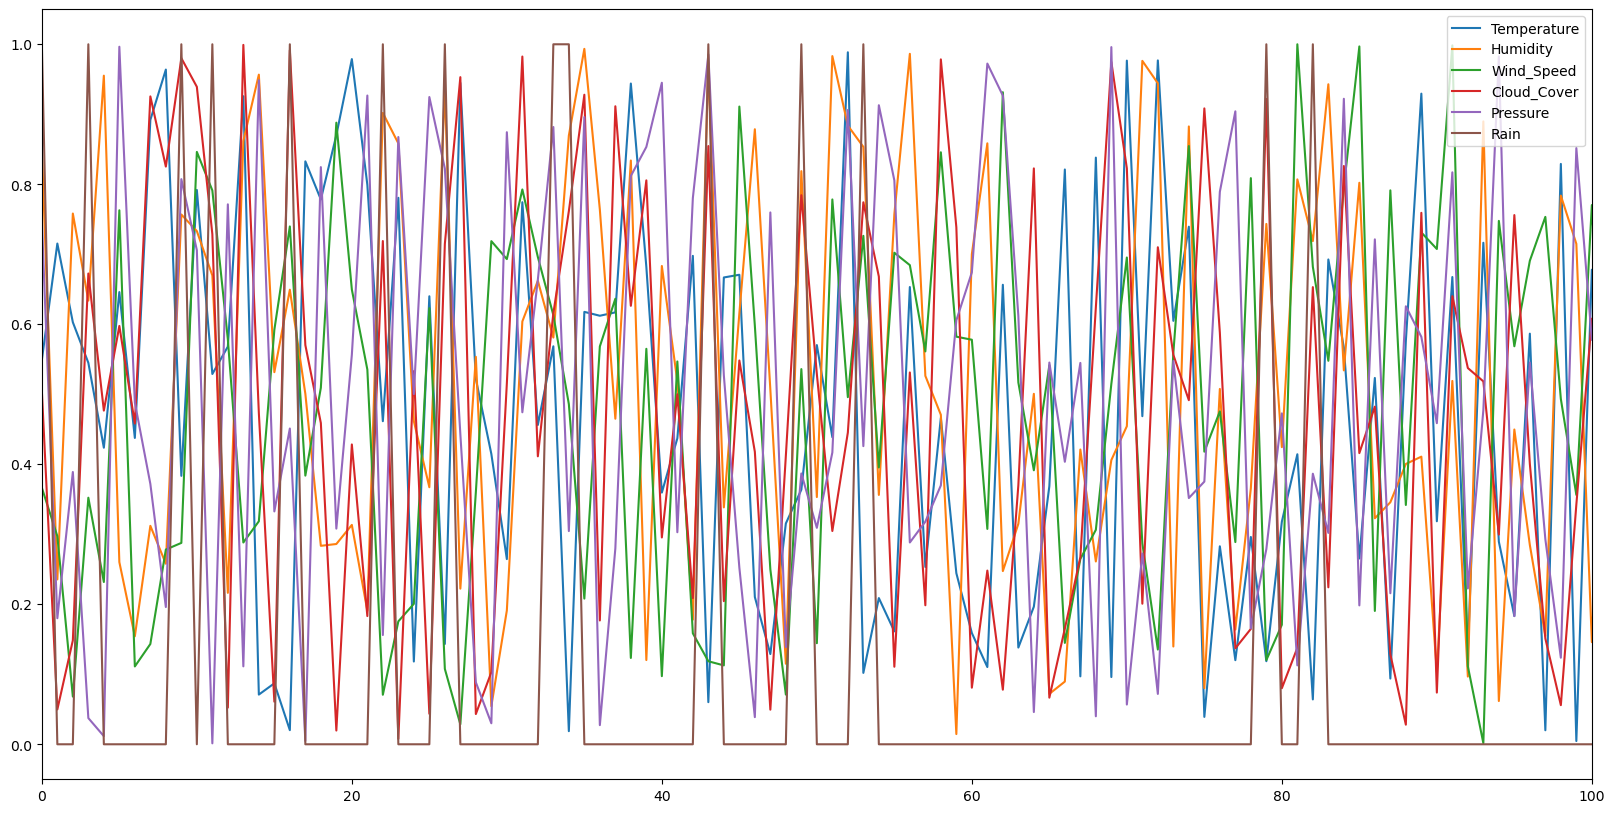

In [15]:
ndf.plot(xlim=(0,100), figsize=(20,10))
pp.show()

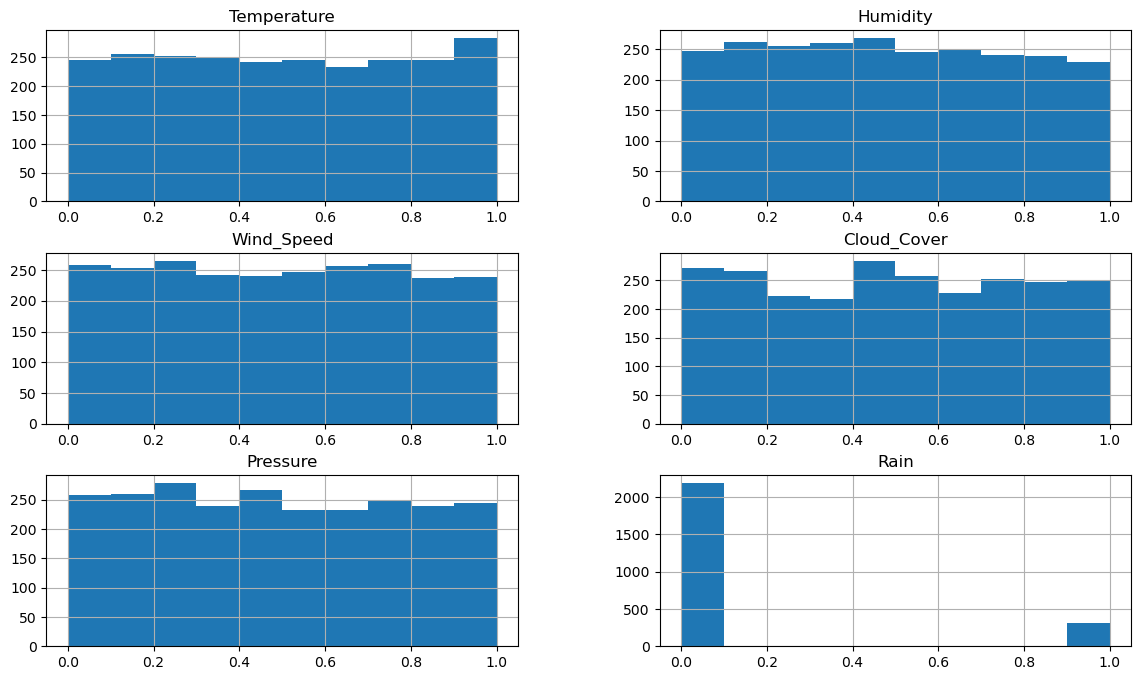

In [17]:
ndf.hist(figsize=(14,8))
pp.show()

Text(0.5, 0.98, 'Feature pairplot')

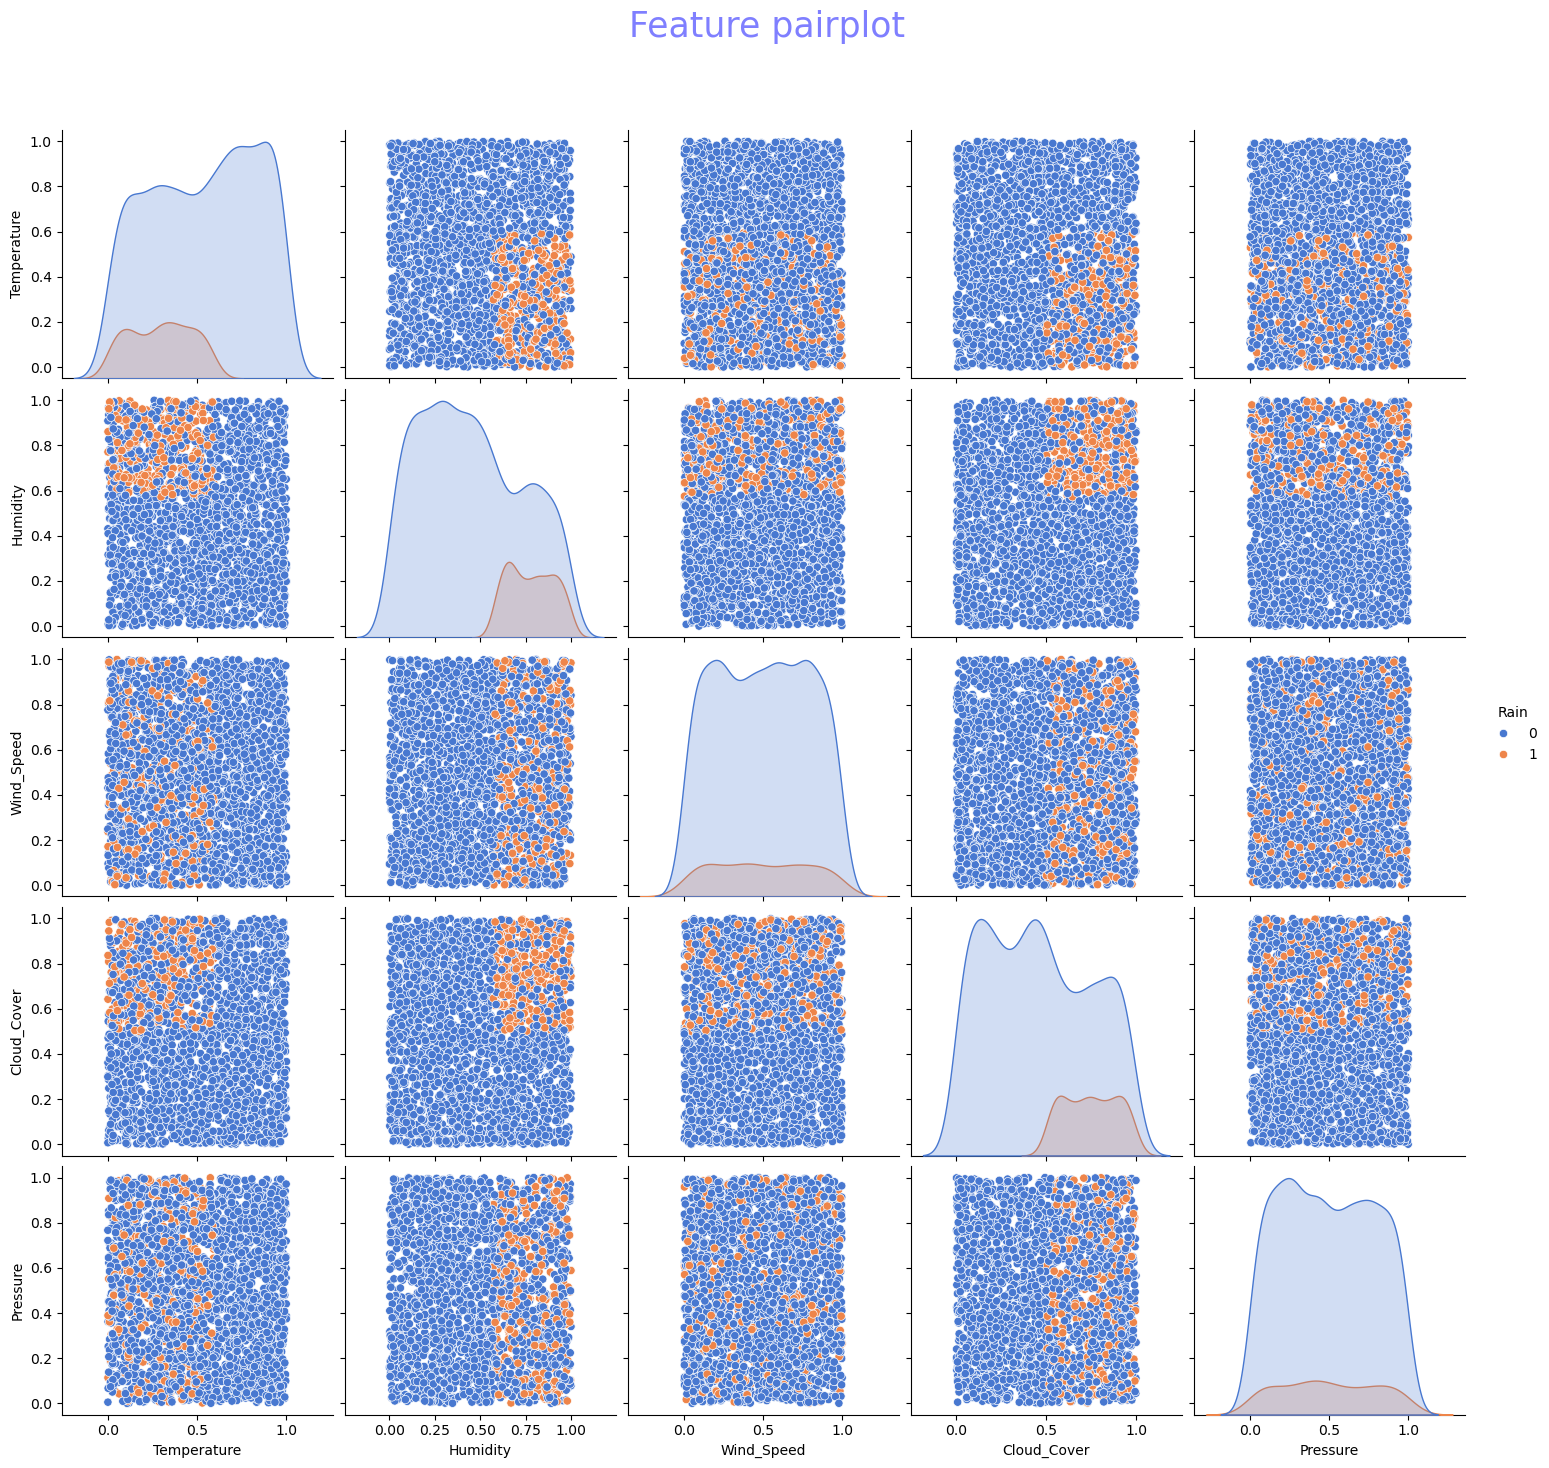

In [19]:
import seaborn as sns
#Creating a pairplot
ndfPairPlot = sns.pairplot(ndf,hue='Rain',palette="muted",height=3,vars=['Temperature','Humidity','Wind_Speed', 'Cloud_Cover', 'Pressure'],kind='scatter')
#Extra space to display the title correctly
pp.subplots_adjust(top=0.9)
#Giving a title of the pairplot
ndfPairPlot.fig.suptitle('Feature pairplot',fontsize=25,color='b',alpha=0.5)

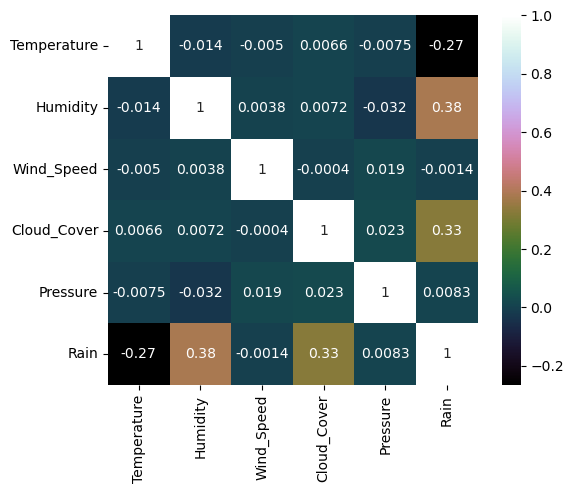

In [21]:
heatndf=df.corr(method='pearson')
sns.heatmap(heatndf,vmax=1,square=True,annot=True,cmap='cubehelix')
pp.show()

In [24]:
def getClassAmounts(ndfOut):
    nRain = 0
    nNoRain = 0
    for value in ndfOut.values:
        if value == 1:
            nRain += 1
        else:
            nNoRain += 1
    return nRain, nNoRain, nRain*100/len(ndfOut), nNoRain*100/len(ndfOut)

In [25]:
def barFromConfusionMatrix(matrix, name, xlabel, ylabel):
    tn, fp, fn, tp = matrix.ravel()
    pp.figure()
    perList = [round(tn + tp, 3), round(fp + fn, 3)]
    bars = pp.bar(['True Positive', 'False Positive'], perList, color=['green', 'red'])
    pp.bar_label(bars, perList, label_type='center', color='white')
    pp.title(name)
    pp.xlabel(xlabel)
    pp.ylabel(ylabel)
    #pp.tight_layout()
    pp.show()
    #print(f"{name} percentage (correct/incorrect): ({(tn+tp):.3f}, {(fn+fp):.3f})")

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def test(name, model, iterations, ndfInTrain, ndfInTest, ndfOutTrain, ndfOutTest, testTrainingData=False):
    accuracy = 0
    confusionMatrix = 0
    for i in range(iterations):
        # To get rid of warnings
        ndfOutTrain = ndfOutTrain.squeeze()

        model.fit(ndfInTrain, ndfOutTrain)

        if testTrainingData:
            pred = model.predict(ndfInTrain)
            accuracy += accuracy_score(ndfOutTrain, pred)
            confusionMatrix += confusion_matrix(ndfOutTrain, pred)
        else:
            pred = model.predict(ndfInTest)
            accuracy += accuracy_score(ndfOutTest, pred)
            confusionMatrix += confusion_matrix(ndfOutTest, pred)
    accuracy /= iterations
    display = ConfusionMatrixDisplay(confusionMatrix / iterations)
    display.plot()
    pp.title(name)
    pp.show()
    return accuracy

In [32]:
## from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

def runTests(ndfIn, ndfOut, testTrainingData, nIterations = 35):
    if (testTrainingData):
        print("Testing against training data")
    else:
        print("Testing against test data")

    # Using random_state, which makes the output reproducible. No need to call it every test,
    # as it will always return the same composition
    ndfInTrain, ndfInTest, ndfOutTrain, ndfOutTest = train_test_split(ndfIn, ndfOut, test_size=0.2, random_state=1337)

    nTrainRain, nTrainNoRain, perTrainRain, perTrainNoRain = getClassAmounts(ndfOutTrain)
    nTestRain, nTestNoRain, perTestRain, perTestNoRain = getClassAmounts(ndfOutTest)
    
    print(f"Training data (Rain/No Rain): ({nTrainRain}, {nTrainNoRain}), ({perTrainRain}%, {perTrainNoRain}%)")
    print(f"Testing data (Rain/No Rain): ({nTestRain}, {nTestNoRain}) ({perTestRain}%, {perTestNoRain}%)")

    kList = range(3, 6, 2)
    accManList = []
    accEucList = []
    crossManList = []
    crossEucList = []
    #####################
    # kNN
    for i in kList:
        # Manhattan distance
        knnMan = KNeighborsClassifier(n_neighbors=i, p=1)
        name = f"{i}NN manhattan distance"
        accuracy = test(name, knnMan, nIterations, ndfInTrain, ndfInTest, ndfOutTrain, ndfOutTest, testTrainingData)
        accManList.append(accuracy)
        crossScore = cross_val_score(knnMan, ndfIn, ndfOut.squeeze(), cv=nIterations).mean()
        crossManList.append(crossScore)

        # Euclidean distance
        knnEuc = KNeighborsClassifier(n_neighbors=i, p=2)
        name = f"{i}NN euclidean distance"
        accuracy = test(name, knnEuc, nIterations, ndfInTrain, ndfInTest, ndfOutTrain, ndfOutTest, testTrainingData)
        accEucList.append(accuracy)
        crossScore = cross_val_score(knnEuc, ndfIn, ndfOut.squeeze(), cv=nIterations).mean()
        crossEucList.append(crossScore)

    knnDf = pd.DataFrame({
        'k': kList,
        'Manhattan Distance': accManList,
        'Euclidean Distance': accEucList
    })

    print("kNN accuracy")
    print(knnDf.to_string(index=False))
    
    knnCrossDf = pd.DataFrame({
        'k': kList,
        'Manhattan Distance': crossManList,
        'Euclidean Distance': crossEucList
    })

    print("kNN cross validation score")
    print(knnCrossDf.to_string(index=False))
        
    #####################
    # Decision Tree

    depthList = range(5, 11, 5)
    minSampleList = range(2, 8, 5)
    accList = []
    crossList = []
    perConfMatList = []
    for i in depthList:
        accList.append([])
        crossList.append([])
        perConfMatList.append([])
        for j in minSampleList:
            dt = DecisionTreeClassifier(max_depth=i, min_samples_split=j)
            name = f"Decision Tree depth={i}, Min Sample Split={j}"
            accuracy = test(name, dt, nIterations, ndfInTrain, ndfInTest, ndfOutTrain, ndfOutTest, testTrainingData)
            accList[-1].append(accuracy)
            crossScore = cross_val_score(dt, ndfIn, ndfOut.squeeze(), cv=nIterations).mean()
            crossList[-1].append(crossScore)

    dTreeDf = pd.DataFrame(data=accList, columns=minSampleList, index=depthList)
    dTreeDf.columns.name = 'Min Samples Split'
    dTreeDf.index.name = 'Max Depth'
    print("Decision tree accuracy")
    print(dTreeDf)
    
    dTreeScoreDf = pd.DataFrame(data=accList, columns=minSampleList, index=depthList)
    dTreeScoreDf.columns.name = 'Min Samples Split'
    dTreeScoreDf.index.name = 'Max Depth'
    print("Decision tree cross validation score")
    print(dTreeScoreDf)

In [30]:
ndfIn = ndf.drop('Rain', axis=1)
ndfOut = ndf[['Rain']]

print(ndfIn.head())
print(ndfOut.head())

   Temperature  Humidity  Wind_Speed  Cloud_Cover  Pressure
0     0.548885  0.851343    0.366485     0.504954  0.748370
1     0.715305  0.235520    0.297292     0.049759  0.180070
2     0.602850  0.758193    0.068145     0.148433  0.388977
3     0.544954  0.633821    0.352225     0.672518  0.037409
4     0.423693  0.955157    0.231829     0.476696  0.011586
   Rain
0     1
1     0
2     0
3     1
4     0


Testing against test data
Training data (Rain/No Rain): (252, 1748), (12.6%, 87.4%)
Testing data (Rain/No Rain): (62, 438) (12.4%, 87.6%)


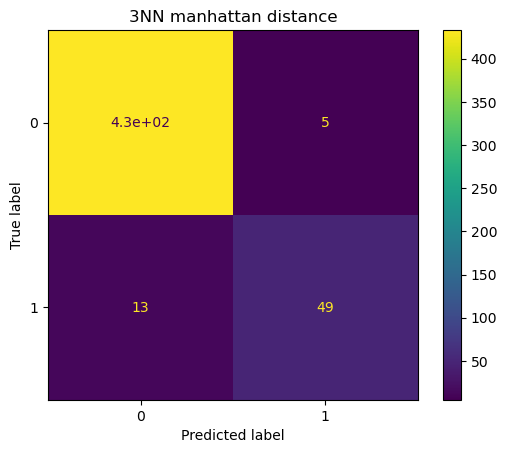

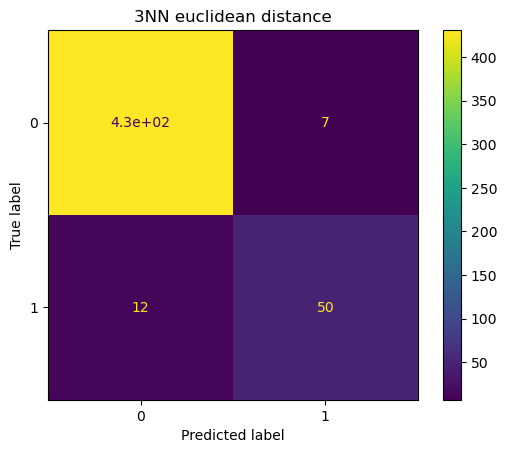

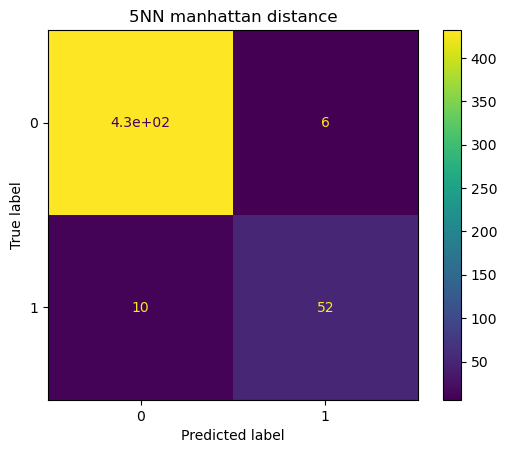

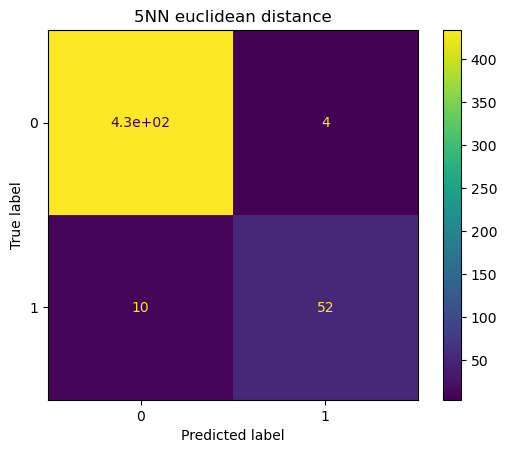

kNN accuracy
 k  Manhattan Distance  Euclidean Distance
 3               0.964               0.962
 5               0.968               0.972
kNN cross validation score
 k  Manhattan Distance  Euclidean Distance
 3            0.970003            0.965616
 5            0.972412            0.969215


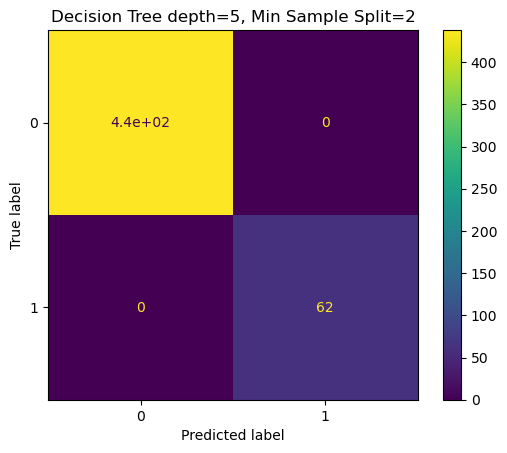

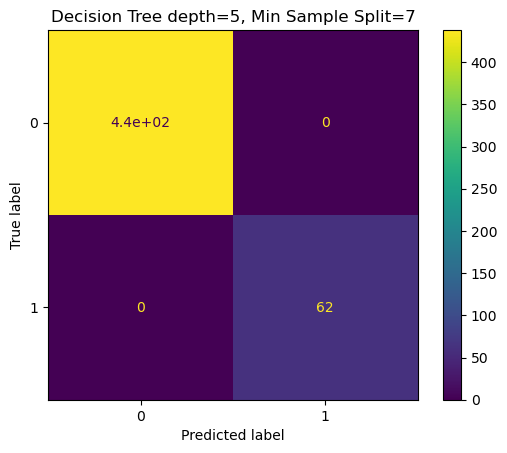

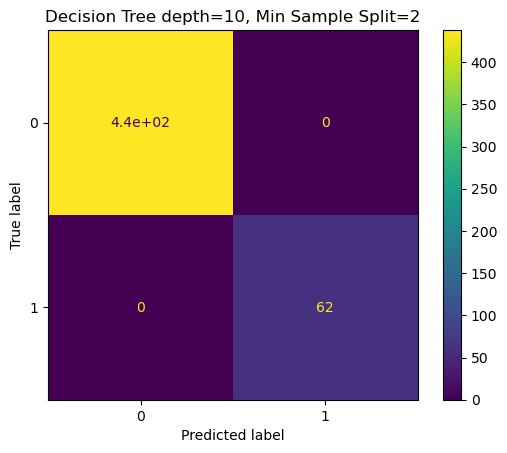

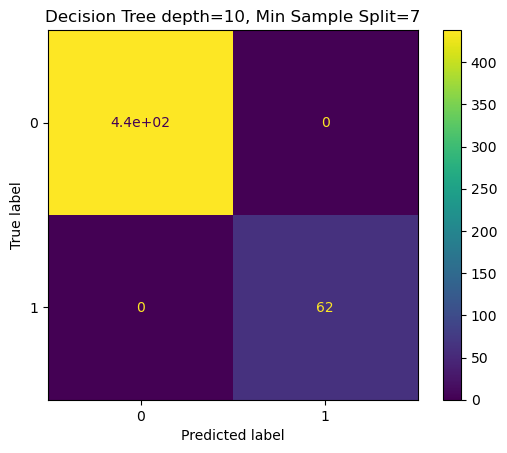

Decision tree accuracy
Min Samples Split    2    7
Max Depth                  
5                  1.0  1.0
10                 1.0  1.0
Decision tree cross validation score
Min Samples Split    2    7
Max Depth                  
5                  1.0  1.0
10                 1.0  1.0


In [33]:
runTests(ndfIn, ndfOut, testTrainingData=False)

Testing against training data
Training data (Rain/No Rain): (252, 1748), (12.6%, 87.4%)
Testing data (Rain/No Rain): (62, 438) (12.4%, 87.6%)


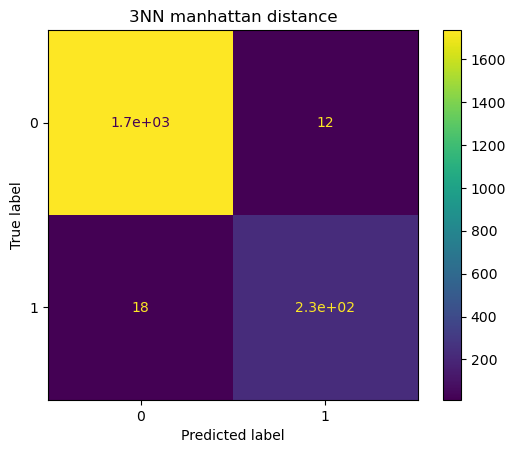

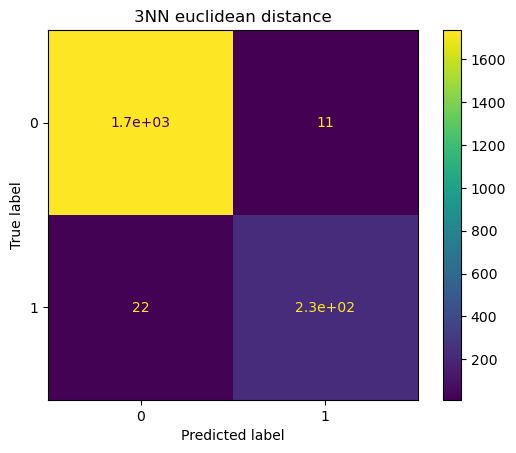

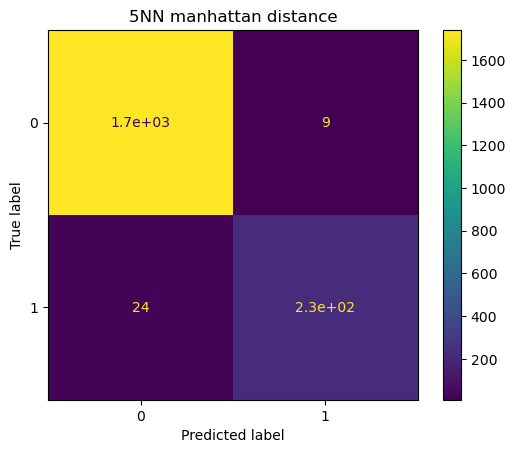

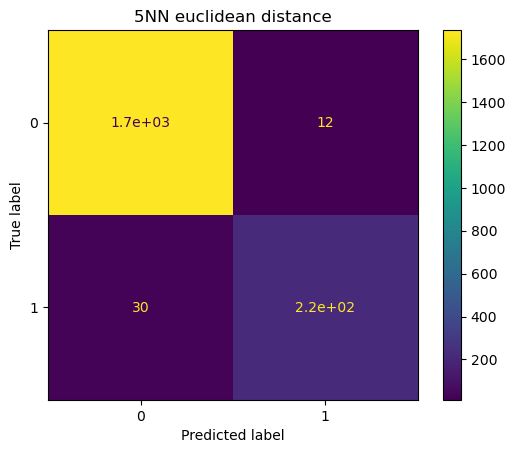

kNN accuracy
 k  Manhattan Distance  Euclidean Distance
 3              0.9850              0.9835
 5              0.9835              0.9790
kNN cross validation score
 k  Manhattan Distance  Euclidean Distance
 3            0.970003            0.965616
 5            0.972412            0.969215


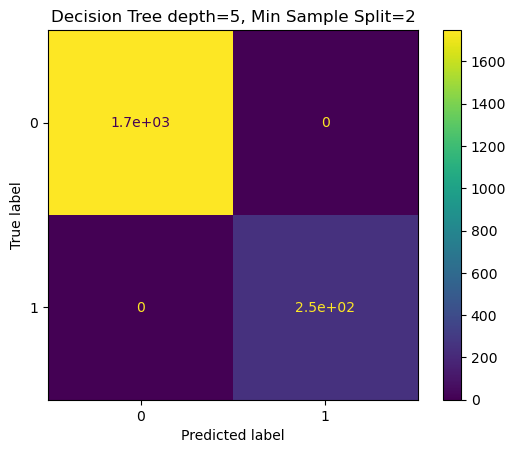

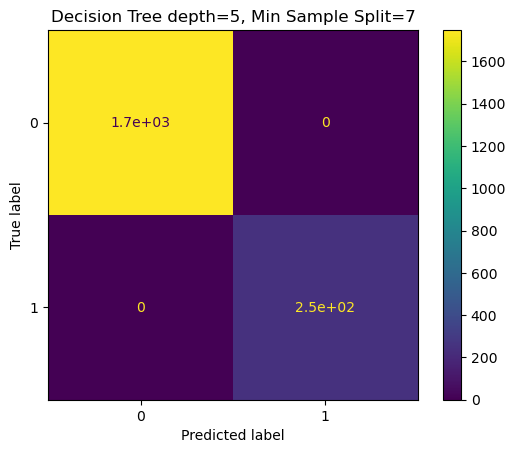

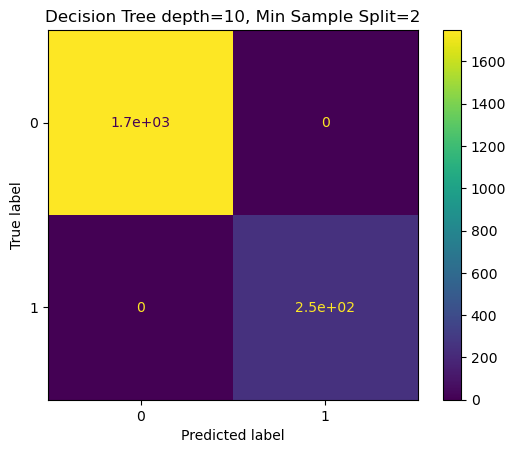

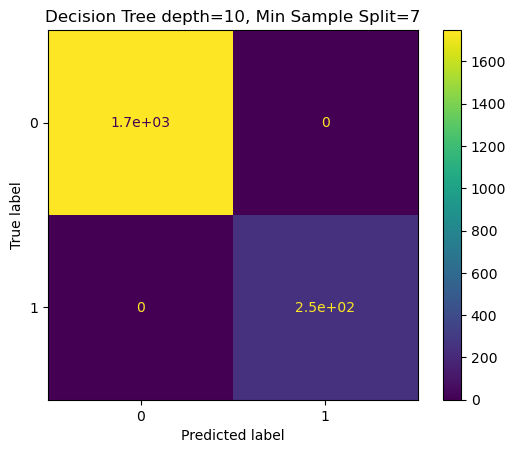

Decision tree accuracy
Min Samples Split    2    7
Max Depth                  
5                  1.0  1.0
10                 1.0  1.0
Decision tree cross validation score
Min Samples Split    2    7
Max Depth                  
5                  1.0  1.0
10                 1.0  1.0


In [34]:
runTests(ndfIn, ndfOut, testTrainingData=True)

In [35]:
ndfInReduced = ndf.drop('Rain', axis=1)
ndfOutReduced = ndf[['Rain']]

print(ndfInReduced.head())
print(ndfOutReduced.head())

   Temperature  Humidity  Wind_Speed  Cloud_Cover  Pressure
0     0.548885  0.851343    0.366485     0.504954  0.748370
1     0.715305  0.235520    0.297292     0.049759  0.180070
2     0.602850  0.758193    0.068145     0.148433  0.388977
3     0.544954  0.633821    0.352225     0.672518  0.037409
4     0.423693  0.955157    0.231829     0.476696  0.011586
   Rain
0     1
1     0
2     0
3     1
4     0


Testing against test data
Training data (Rain/No Rain): (252, 1748), (12.6%, 87.4%)
Testing data (Rain/No Rain): (62, 438) (12.4%, 87.6%)


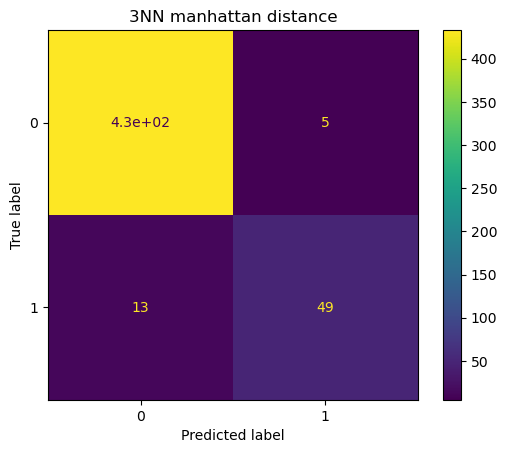

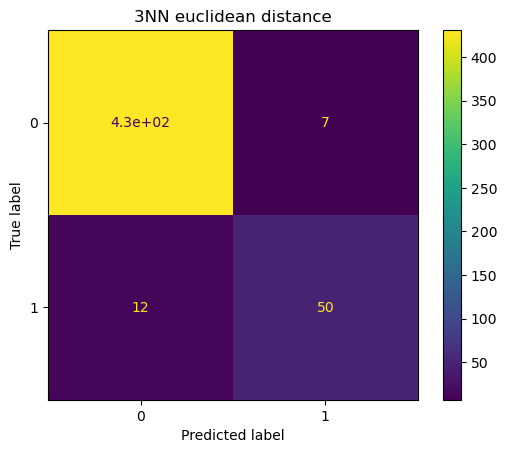

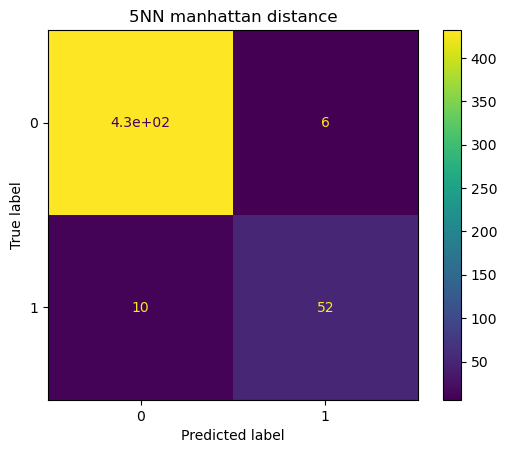

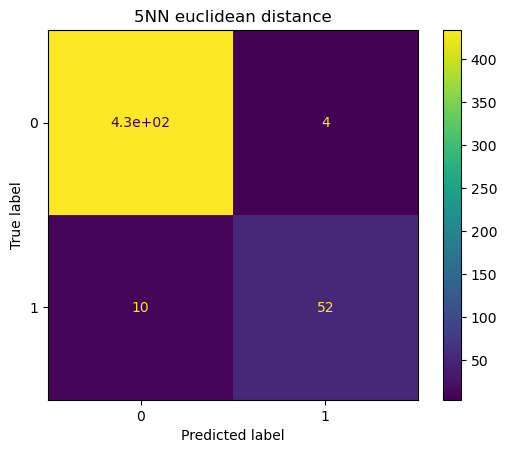

kNN accuracy
 k  Manhattan Distance  Euclidean Distance
 3               0.964               0.962
 5               0.968               0.972
kNN cross validation score
 k  Manhattan Distance  Euclidean Distance
 3            0.970003            0.965616
 5            0.972412            0.969215


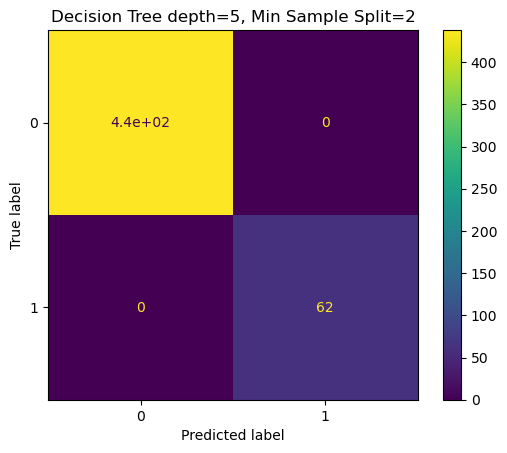

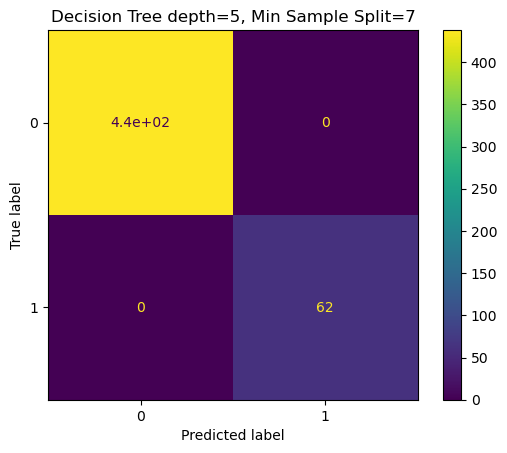

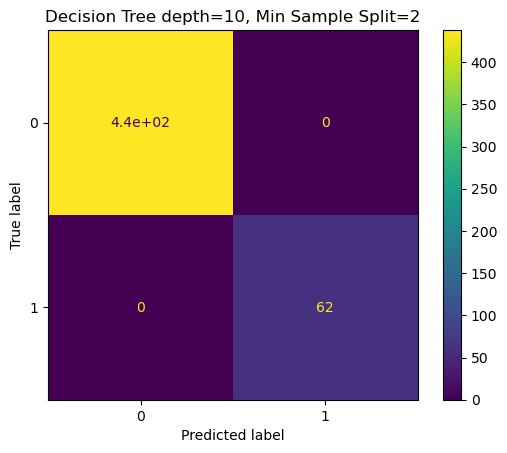

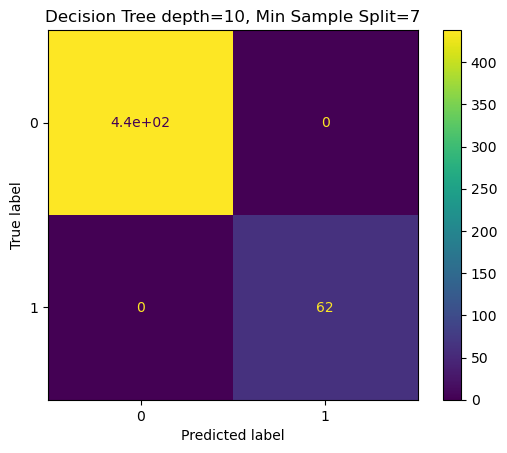

Decision tree accuracy
Min Samples Split    2    7
Max Depth                  
5                  1.0  1.0
10                 1.0  1.0
Decision tree cross validation score
Min Samples Split    2    7
Max Depth                  
5                  1.0  1.0
10                 1.0  1.0


In [36]:
runTests(ndfInReduced, ndfOutReduced, testTrainingData=False)

Testing against training data
Training data (Rain/No Rain): (252, 1748), (12.6%, 87.4%)
Testing data (Rain/No Rain): (62, 438) (12.4%, 87.6%)


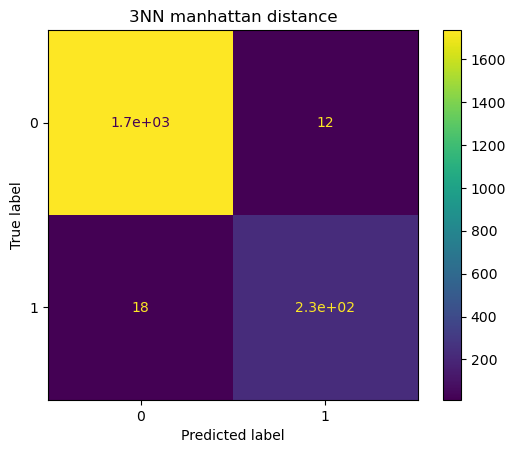

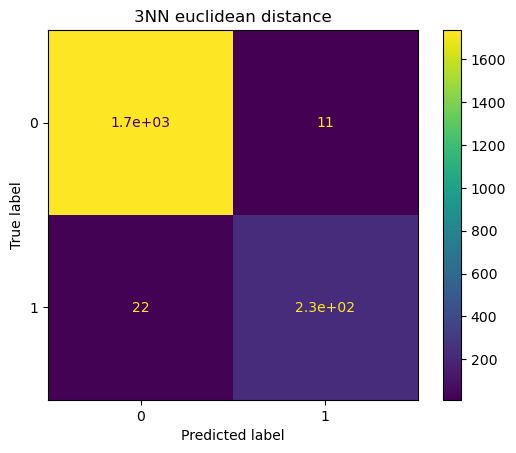

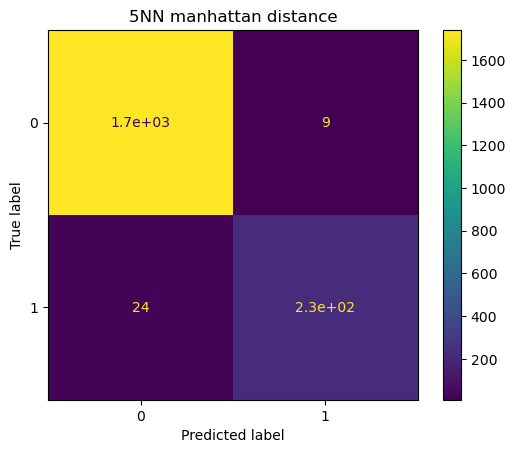

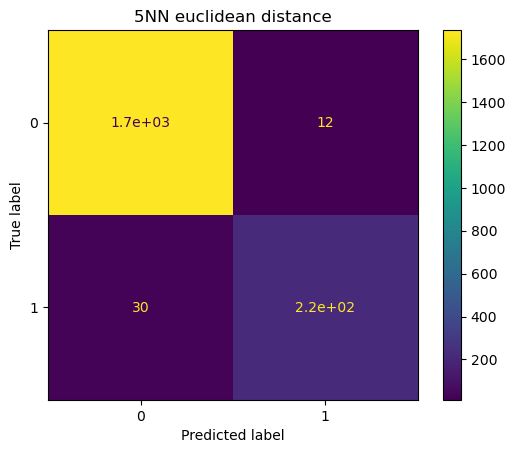

kNN accuracy
 k  Manhattan Distance  Euclidean Distance
 3              0.9850              0.9835
 5              0.9835              0.9790
kNN cross validation score
 k  Manhattan Distance  Euclidean Distance
 3            0.970003            0.965616
 5            0.972412            0.969215


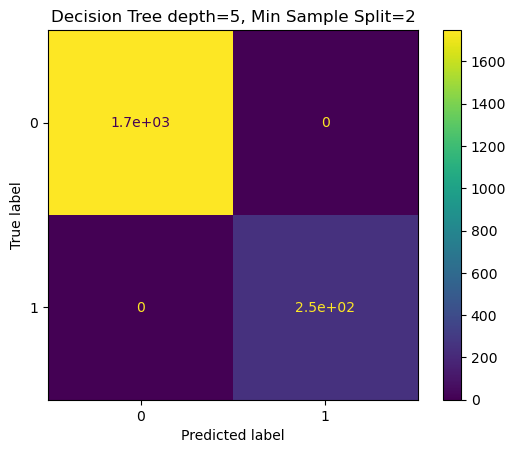

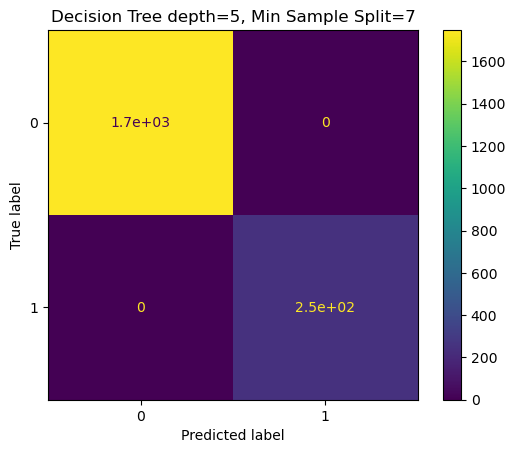

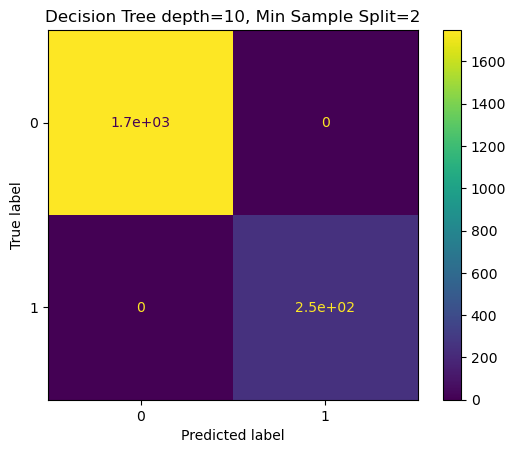

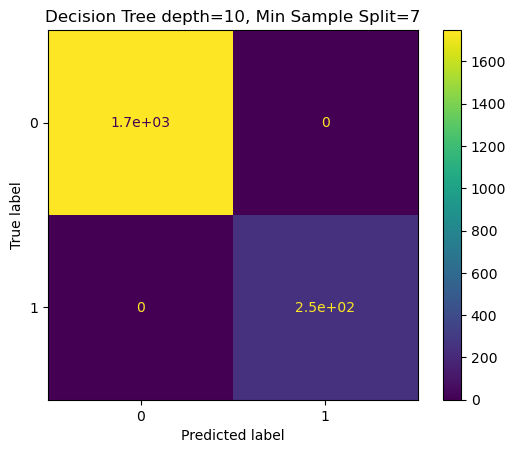

Decision tree accuracy
Min Samples Split    2    7
Max Depth                  
5                  1.0  1.0
10                 1.0  1.0
Decision tree cross validation score
Min Samples Split    2    7
Max Depth                  
5                  1.0  1.0
10                 1.0  1.0


In [37]:
runTests(ndfInReduced, ndfOutReduced, testTrainingData=True)